# Basics of Image Processing

<b> Citation </b> I referred to this wonderfull github account to learn this. You can also download it from 

* https://github.com/anujshah1003/dataloaders_in_pytorch_for_different_data_augmentations
* I referred to Stat Quest video on convolution - 
* Use chatGPT for learning


# Import and Install Libraries

In [42]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2 as cv
import numpy as np
import torchvision.transforms as transforms
import torch 
import torch.nn.functional as F

## Loading image using PIL

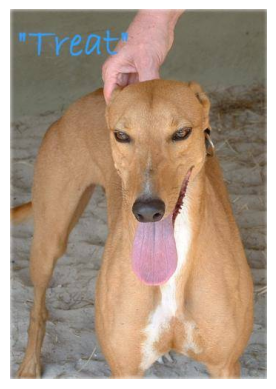

In [90]:
# Open the image
img = Image.open("./Data/dogs-vs-cats/train/train/dog.1001.jpg")

# Display it
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

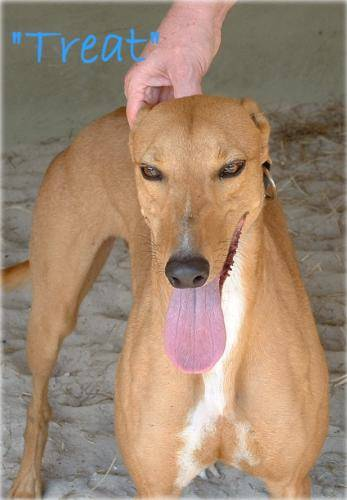

In [3]:
# Convert image from array
Image.fromarray(np.array(img))

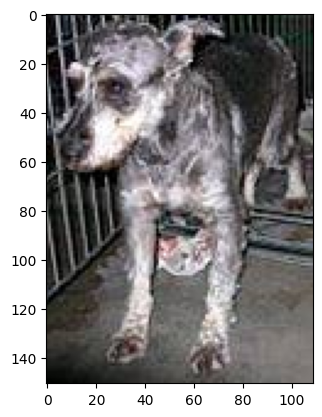

In [4]:
# BLW image
blwimg = Image.open("./Data/dogs-vs-cats/train/train/dog.10001.jpg")
plt.imshow(blwimg)

In [5]:
# Black and white images are represented as 2 dimesnional array
np.array(img.convert("L"))

array([[210, 198, 186, ..., 174, 187, 197],
       [199, 186, 173, ..., 158, 171, 182],
       [188, 173, 157, ..., 147, 161, 172],
       ...,
       [188, 175, 161, ..., 171, 181, 189],
       [198, 187, 175, ..., 181, 192, 199],
       [204, 195, 185, ..., 188, 198, 206]], dtype=uint8)

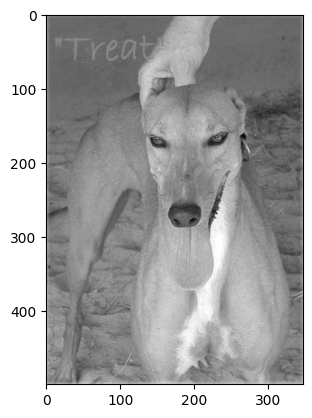

In [6]:


plt.imshow(img.convert("L"), cmap="gray")

Use different channels of RGB to plot imagr

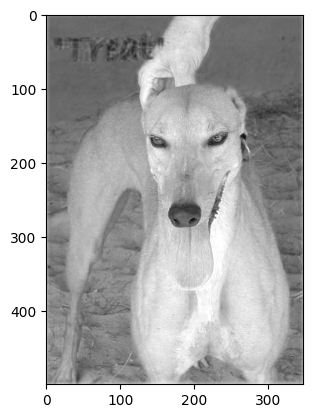

In [7]:
plt.imshow(np.array(img)[:,:,0],cmap = "grey")

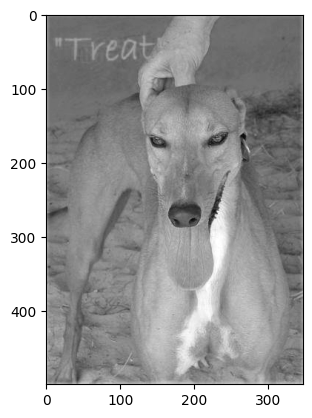

In [8]:
plt.imshow(np.array(img)[:,:,1],cmap = "grey")

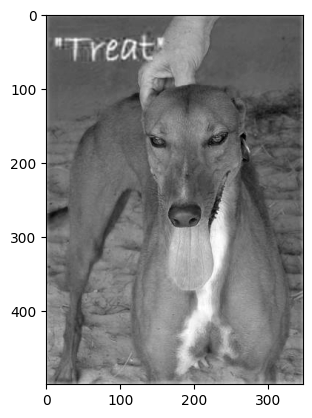

In [92]:
plt.imshow(np.array(img)[:,:,2],cmap = "grey")

## Loading image using cv2

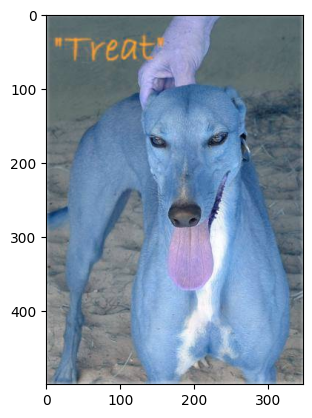

In [47]:
img2 = cv.imread("./Data/dogs-vs-cats/train/train/dog.1001.jpg")
plt.imshow(img2)

OpenCV loads the image in BGR format (Blue, Green, Red), not RGB like most other libraries 
Hence change it to RGB

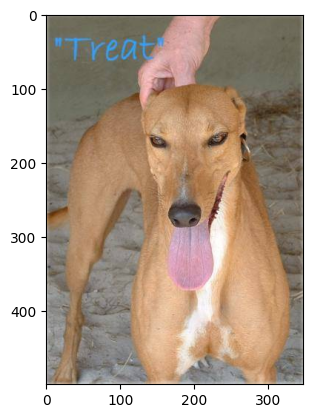

In [48]:
img2_rgb = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
plt.imshow(img2_rgb)

## Changin colors of image

### Neutering the channels of color

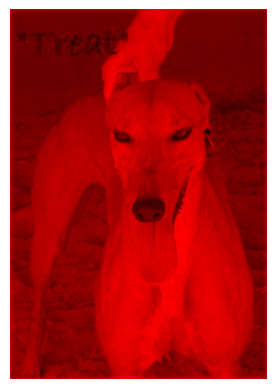

In [51]:
img3 = np.array(img)
img3[:, :, 1] = 0  # Green
img3[:, :, 2] = 0  # Blue

# Display the result
plt.imshow(img3)
plt.axis('off')
plt.show()

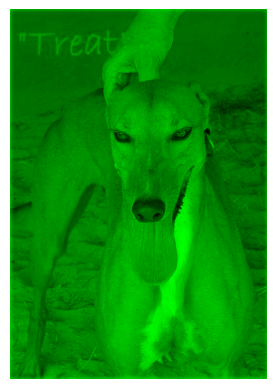

In [56]:
img4 = np.array(img)
img4[:, :, 2] = 0  # Green
img4[:, :, 0] = 0  # Blue

# Display the result
plt.imshow(img4)
plt.axis('off')
plt.show()

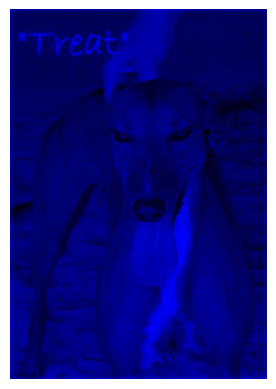

In [57]:
img5 = np.array(img)
img5[:, :, 1] = 0  # Green
img5[:, :, 0] = 0  # Blue

# Display the result
plt.imshow(img5)
plt.axis('off')
plt.show()

### Flipping channels of color

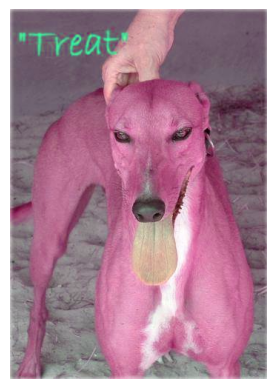

In [60]:
img6 = np.array(img)
img6[:, :, 1]  = np.array(img)[:, :, 2] 
img6[:, :, 2]  = np.array(img)[:, :, 1] 

# Display the result
plt.imshow(img6)
plt.axis('off')
plt.show()

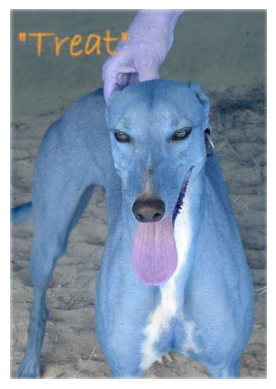

In [61]:
img6 = np.array(img)
img6[:, :, 0]  = np.array(img)[:, :, 2] 
img6[:, :, 2]  = np.array(img)[:, :, 0] 

# Display the result
plt.imshow(img6)
plt.axis('off')
plt.show()

## Torch vision library

### Distortion

Text(0.5, 1.0, 'distortion_scale=0.27')

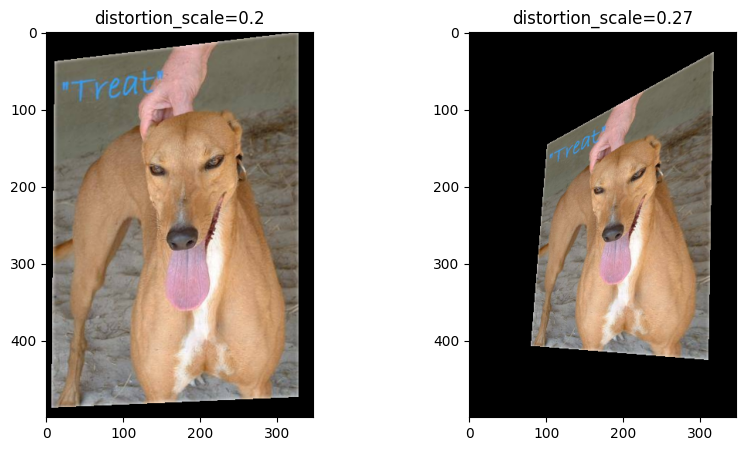

In [109]:
t1=transforms.RandomPerspective(distortion_scale=0.2, p=1.0)
t2=transforms.RandomPerspective(distortion_scale=0.7, p=1.0)

fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(1,2)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0,1])

ax1.imshow(t1(img))
ax1.set_title("distortion_scale=0.2")
ax2.imshow(t2(img))
ax2.set_title("distortion_scale=0.27")

### Rotation

Text(0.5, 1.0, 'rotation = 270')

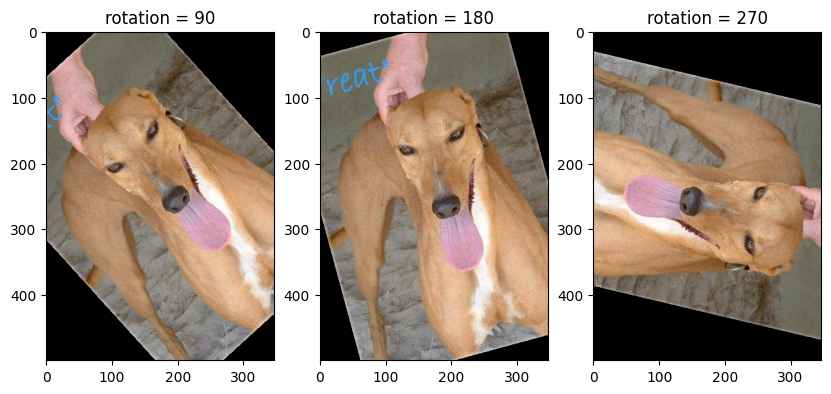

In [115]:
t1=transforms.RandomRotation(degrees=(0, 90))
t2=transforms.RandomRotation(degrees=(0, 180))
t3=transforms.RandomRotation(degrees=(0, 270))

fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(1,3)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])

ax1.imshow(t1(img))
ax1.set_title("rotation = 90")
ax2.imshow(t2(img))
ax2.set_title("rotation = 180")
ax3.imshow(t3(img))
ax3.set_title("rotation = 270")

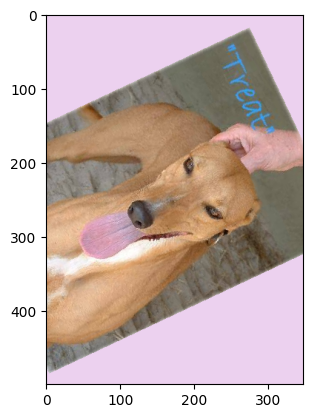

In [169]:
t1=transforms.RandomAffine(degrees=90, fill=(236, 209, 239), translate=(0.1, 0.1), scale=(0.8, 0.9))

plt.imshow(t1(img))

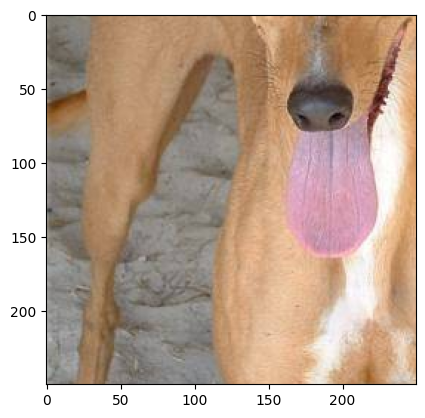

In [174]:
t1=transforms.RandomCrop(size=(250, 250))
plt.imshow(t1(img))

## Composite Transforms

In [176]:
t1=transforms.RandomPerspective(distortion_scale=0.2, p=1.0)
t2=transforms.RandomAffine(degrees=90, fill=(236, 209, 239), translate=(0.1, 0.1), scale=(0.8, 0.9))
t3=transforms.RandomCrop(size=(250, 250))
t4=transforms.RandomRotation(degrees=(0, 180))

compt = transforms.Compose([t1,t2,t4,t2])

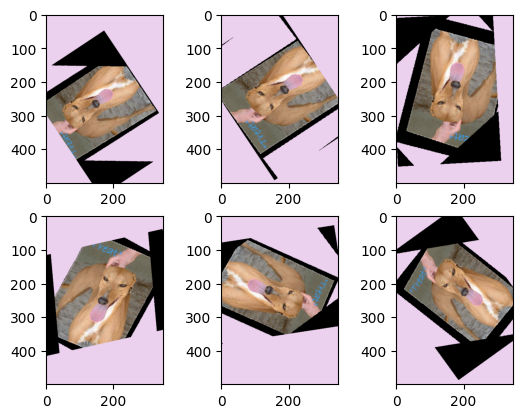

In [183]:
fig = plt.figure()
gs = gridspec.GridSpec(2,3)
ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(compt(img))

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(compt(img))

ax3 = fig.add_subplot(gs[0,2])
ax3.imshow(compt(img))

ax4 = fig.add_subplot(gs[1,0])
ax4.imshow(compt(img))

ax5 = fig.add_subplot(gs[1,1])
ax5.imshow(compt(img))

ax6 = fig.add_subplot(gs[1,2])
ax6.imshow(compt(img))

# Dataset and Data Loader

Let us look at definition of the dataset generator from chat gpt

🧠 What is torch.utils.data.Dataset?
An abstract base class for all datasets in PyTorch.

You subclass it and override two methods:

__len__() → returns the total number of samples.

__getitem__(index) → loads and returns a sample at the given index. 

In [213]:
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self, data_paths, transform=None):
        self.data_paths = data_paths
        self.data_list = os.listdir(data_paths)[0:50]
        self.transform = transform
        self.uniform =  transform = transforms.Compose([transforms.Resize((350,350)),transforms.ToTensor()])

    def __len__(self):
        return len(self.data_list)
    
    def get_labels(self,filename):
        if filename[0:3] == "cat":
            return 0
        else:
            return 1

    def __getitem__(self, idx):
        file_path = os.path.join(self.data_paths , self.data_list[idx])
        image = Image.open(file_path)
        if self.transform:
            image = self.transform(image)
        return self.uniform(image),self.get_labels(self.data_list[idx])


In [214]:
folder_path = "./Data/dogs-vs-cats/train/train/"
ds = MyDataset(folder_path)
ds.__getitem__(1)[0]

tensor([[[0.1529, 0.1529, 0.1569,  ..., 0.8039, 0.7922, 0.7882],
         [0.1569, 0.1569, 0.1569,  ..., 0.7961, 0.7843, 0.7765],
         [0.1569, 0.1569, 0.1569,  ..., 0.7882, 0.7804, 0.7765],
         ...,
         [0.1255, 0.1176, 0.1059,  ..., 0.1608, 0.1765, 0.2196],
         [0.1255, 0.1176, 0.1059,  ..., 0.1725, 0.1765, 0.2000],
         [0.1255, 0.1176, 0.1020,  ..., 0.1882, 0.1647, 0.1569]],

        [[0.1725, 0.1725, 0.1725,  ..., 0.7922, 0.7804, 0.7765],
         [0.1765, 0.1765, 0.1725,  ..., 0.7843, 0.7725, 0.7647],
         [0.1765, 0.1765, 0.1725,  ..., 0.7725, 0.7647, 0.7608],
         ...,
         [0.1176, 0.1098, 0.0980,  ..., 0.1137, 0.1373, 0.1804],
         [0.1176, 0.1098, 0.0980,  ..., 0.1255, 0.1373, 0.1608],
         [0.1176, 0.1098, 0.0941,  ..., 0.1412, 0.1255, 0.1176]],

        [[0.1569, 0.1569, 0.1647,  ..., 0.6667, 0.6471, 0.6392],
         [0.1608, 0.1608, 0.1647,  ..., 0.6588, 0.6392, 0.6275],
         [0.1608, 0.1608, 0.1647,  ..., 0.6510, 0.6392, 0.

In [216]:
from torch.utils.data import DataLoader
dataloader = DataLoader(
    ds,
    batch_size=2,
    shuffle=True)

In [217]:
images = []
for batch,label in dataloader:
    images.append(batch)

In [267]:
images[2][0,:,:,:]

tensor([[[0.2314, 0.2314, 0.2431,  ..., 0.0784, 0.0549, 0.1373],
         [0.2118, 0.2118, 0.2235,  ..., 0.1216, 0.0863, 0.0902],
         [0.2000, 0.1961, 0.2078,  ..., 0.1059, 0.1255, 0.1843],
         ...,
         [0.1922, 0.1922, 0.1922,  ..., 0.1137, 0.1255, 0.1216],
         [0.1725, 0.1765, 0.1804,  ..., 0.1176, 0.1059, 0.1137],
         [0.1725, 0.1765, 0.1765,  ..., 0.1098, 0.0941, 0.0980]],

        [[0.2196, 0.2196, 0.2118,  ..., 0.0824, 0.0549, 0.1373],
         [0.2000, 0.2000, 0.1922,  ..., 0.1098, 0.0745, 0.0784],
         [0.1882, 0.1843, 0.1765,  ..., 0.0745, 0.0863, 0.1451],
         ...,
         [0.6549, 0.6588, 0.6588,  ..., 0.5961, 0.5922, 0.5843],
         [0.6431, 0.6471, 0.6510,  ..., 0.6196, 0.6118, 0.6196],
         [0.6431, 0.6471, 0.6471,  ..., 0.6157, 0.6118, 0.6157]],

        [[0.0431, 0.0510, 0.0667,  ..., 0.0784, 0.0588, 0.1412],
         [0.0235, 0.0314, 0.0471,  ..., 0.0941, 0.0588, 0.0627],
         [0.0118, 0.0196, 0.0392,  ..., 0.0275, 0.0431, 0.

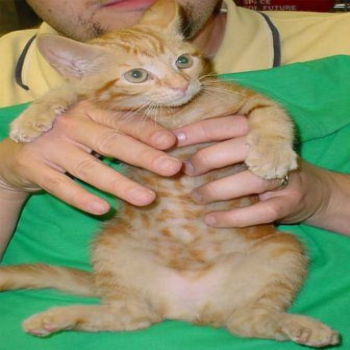

In [272]:
from PIL import Image
imarray = np.transpose(np.array(images[2][0,:,:,:]), (1, 2, 0))
Image.fromarray((imarray * 255).clip(0, 255).astype(np.uint8))

In [253]:
print(image_array.shape)
print(image_array.dtype)
print(image_array.min(), image_array.max())

(3, 350, 350)
float32
0.0 0.85882354


In [252]:
image_array = np.array(images[0][0,:,:,:])

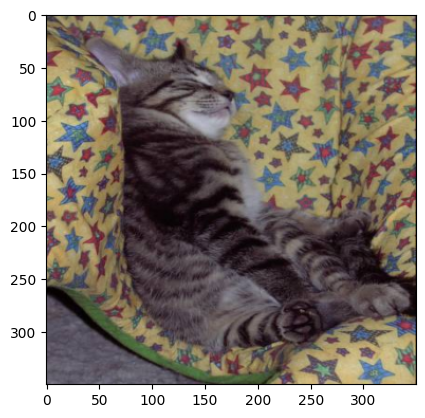

In [257]:
# Your input array
array = image_array  # shape: (3, 350, 350), float32 in [0, ~0.85]

# Step 1: Transpose to (H, W, C)
array = np.transpose(array, (1, 2, 0))  # now shape is (350, 350, 3)

# Step 2: Normalize to 0–255 and convert to uint8
array = (array * 255).clip(0, 255).astype(np.uint8)

# Step 3: Convert to PIL image
img = Image.fromarray(array)  # mode="RGB" inferred
plt.imshow(img)

# Applying Convolutions


Expected shape - 
* Kernel Shape = [out_channels, in_channels_per_group, kH, kW]
* Input tensor = [batch, out_channels, H_out, W_out]

### Applying convolution to a single channel tensor


In [38]:
# 1. Create a 10x10 input matrix (1 channel, batch size 1)
input_matrix = torch.ones(100, dtype=torch.float32).view(1, 1, 10, 10)

# 2. Define a simple 3x3 kernel (e.g., edge detection)
kernel = torch.tensor([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
],dtype=torch.float32)

# Reshape to (out_channels, in_channels, H, W)
kernel = kernel.view(1, 1, 3, 3)

# 3. Apply convolution with padding=1 to keep output size same
output = F.conv2d(input_matrix, kernel)

# 4. Print input and output
print("Input:\n", input_matrix.squeeze())
print("\nKernel:\n", kernel.squeeze())
print("\nOutput:\n", output.squeeze())


Input:
 tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

Kernel:
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Output:
 tensor([[9., 9., 9., 9., 9., 9., 9., 9.],
        [9., 9., 9., 9., 9., 9., 9., 9.],
        [9., 9., 9., 9., 9., 9., 9., 9.],
        [9., 9., 9., 9., 9., 9., 9., 9.],
        [9., 9., 9., 9., 9., 9., 9., 9.],
        [9., 9., 9., 9., 9., 9., 9., 9.],
        [9., 9., 9., 9., 9., 9., 9., 9.],
        [9., 9., 9., 9., 9., 9., 9., 9.]])


### Applying convolution to a 2 channel tensor where output is 1 channel


In [147]:
import torch
import torch.nn.functional as F

# 1. Create a 10x10 input matrix (1 channel, batch size 1)
input_matrix = torch.ones(200, dtype=torch.float32).view(1, 2, 10, 10)

# 2. Define a simple 3x3 kernel (e.g., edge detection)
kernel = torch.tensor([[
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
],[
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]],dtype=torch.float32)

# Reshape to (out_channels, in_channels, H, W)
kernel = kernel.view(1, 2, 3, 3)

# 3. Apply convolution with padding=1 to keep output size same
output = F.conv2d(input_matrix, kernel)

# 4. Print input and output
print("Input:\n", input_matrix.squeeze())
print("\nKernel:\n", kernel.squeeze())
print("\nOutput:\n", output.squeeze())


torch.Size([3, 3, 3])
torch.Size([3, 1, 3, 3])


### Applying convolution to a 2 channel tensor where output is 2 channel


In [40]:

# Input: 1 batch, 2 channels, 10x10 — filled with 1s
input_matrix = torch.ones(1, 2, 10, 10)

# Kernel: 2 output channels, 1 for each group (so 2), each with 1 input channel
# Kernel shape must be (out_channels, in_channels_per_group, kH, kW)
kernel = torch.tensor([
    [  # Group 1: input channel 0
        [ [1, 1, 1],
          [1, 1, 1],
          [1, 1, 1] ]
    ],
    [  # Group 2: input channel 1
        [ [1, 1, 1],
          [1, 1, 1],
          [1, 1, 1] ]
    ]
], dtype=torch.float32)

# Shape: (2 output channels, 1 input channel per group, 3, 3)
print("Kernel shape:", kernel.shape)

# Apply convolution with groups=2 and padding=1
output = F.conv2d(input_matrix, kernel, padding=1, groups=2)

# Output shape: [1, 2, 10, 10]
print("Output shape:", output.shape)
print("\nOutput channel 0:\n", output[0, 0])
print("\nOutput channel 1:\n", output[0, 1])


Kernel shape: torch.Size([2, 1, 3, 3])
Output shape: torch.Size([1, 2, 10, 10])

Output channel 0:
 tensor([[4., 6., 6., 6., 6., 6., 6., 6., 6., 4.],
        [6., 9., 9., 9., 9., 9., 9., 9., 9., 6.],
        [6., 9., 9., 9., 9., 9., 9., 9., 9., 6.],
        [6., 9., 9., 9., 9., 9., 9., 9., 9., 6.],
        [6., 9., 9., 9., 9., 9., 9., 9., 9., 6.],
        [6., 9., 9., 9., 9., 9., 9., 9., 9., 6.],
        [6., 9., 9., 9., 9., 9., 9., 9., 9., 6.],
        [6., 9., 9., 9., 9., 9., 9., 9., 9., 6.],
        [6., 9., 9., 9., 9., 9., 9., 9., 9., 6.],
        [4., 6., 6., 6., 6., 6., 6., 6., 6., 4.]])

Output channel 1:
 tensor([[4., 6., 6., 6., 6., 6., 6., 6., 6., 4.],
        [6., 9., 9., 9., 9., 9., 9., 9., 9., 6.],
        [6., 9., 9., 9., 9., 9., 9., 9., 9., 6.],
        [6., 9., 9., 9., 9., 9., 9., 9., 9., 6.],
        [6., 9., 9., 9., 9., 9., 9., 9., 9., 6.],
        [6., 9., 9., 9., 9., 9., 9., 9., 9., 6.],
        [6., 9., 9., 9., 9., 9., 9., 9., 9., 6.],
        [6., 9., 9., 9., 9., 

## Applying Identity kernel to a image RGB

In [100]:
trs = transforms.Resize((340,340))
small_img = trs(img)

In [101]:
to_tns = transforms.ToTensor()
image_tensor = to_tns(small_img)
print(image_tensor.shape)
print(image_tensor)

torch.Size([3, 340, 340])
tensor([[[0.8235, 0.7725, 0.7255,  ..., 0.6706, 0.7176, 0.7569],
         [0.7647, 0.7059, 0.6471,  ..., 0.6000, 0.6510, 0.6902],
         [0.7294, 0.6588, 0.5882,  ..., 0.5451, 0.6000, 0.6431],
         ...,
         [0.7137, 0.6549, 0.5961,  ..., 0.6196, 0.6667, 0.7020],
         [0.7529, 0.7020, 0.6510,  ..., 0.6667, 0.7098, 0.7412],
         [0.7961, 0.7569, 0.7137,  ..., 0.7137, 0.7529, 0.7843]],

        [[0.8039, 0.7529, 0.7059,  ..., 0.6588, 0.7059, 0.7569],
         [0.7451, 0.6863, 0.6275,  ..., 0.5882, 0.6392, 0.6902],
         [0.7098, 0.6392, 0.5725,  ..., 0.5333, 0.5882, 0.6431],
         ...,
         [0.6902, 0.6353, 0.5765,  ..., 0.6353, 0.6824, 0.7176],
         [0.7412, 0.6902, 0.6431,  ..., 0.6824, 0.7255, 0.7569],
         [0.7843, 0.7451, 0.7059,  ..., 0.7294, 0.7686, 0.8000]],

        [[0.7804, 0.7294, 0.6824,  ..., 0.6235, 0.6706, 0.7176],
         [0.7216, 0.6627, 0.6039,  ..., 0.5529, 0.6039, 0.6510],
         [0.6863, 0.6157, 0.5451

In [102]:
image_tensor = image_tensor.unsqueeze(0)

In [56]:
# Let us check actual RGB Values
print(np.array(small_img).shape)
print(np.array(small_img))

(24, 24, 3)
[[[123 120 105]
  [116 113  96]
  [116 113  96]
  ...
  [115 112  95]
  [114 112  94]
  [119 115  99]]

 [[113 119 113]
  [102 116 116]
  [101 117 122]
  ...
  [109 106  89]
  [108 105  87]
  [113 110  92]]

 [[116 117 106]
  [106 110  99]
  [ 99 116 119]
  ...
  [107 104  87]
  [106 103  84]
  [112 109  92]]

 ...

 [[148 148 145]
  [150 137 125]
  [146 117  89]
  ...
  [189 144 104]
  [145 129 113]
  [131 131 129]]

 [[148 145 141]
  [155 134 113]
  [144 120  96]
  ...
  [155 125  98]
  [119 117 111]
  [121 121 117]]

 [[150 140 130]
  [162 135 108]
  [142 122  99]
  ...
  [148 127 109]
  [126 127 125]
  [132 132 130]]]


In [157]:
identity_kernel = torch.tensor([[
[0,  0,  0],
[0,  1,  0],
[0,  0,  0]],
[
[0,  0,  0],
[0,  1,  0],
[0,  0,  0]],
[
[0,  0,  0],
[0,  1,  0],
[0,  0,  0]]], dtype =  torch.float32)


red_filter = torch.tensor([[
[0,  0,  0],
[0,  1,  0],
[0,  0,  0]],
[
[0,  0,  0],
[0,  0,  0],
[0,  0,  0]],
[
[0,  0,  0],
[0,  0,  0],
[0,  0,  0]]], dtype =  torch.float32)

green_filter = torch.tensor([[
[0,  0,  0],
[0,  0,  0],
[0,  0,  0]],
[
[0,  0,  0],
[0,  1,  0],
[0,  0,  0]],
[
[0,  0,  0],
[0,  0,  0],
[0,  0,  0]]], dtype =  torch.float32)

blue_filter = torch.tensor([[
[0,  0,  0],
[0,  0,  0],
[0,  0,  0]],
[
[0,  0,  0],
[0,  0,  0],
[0,  0,  0]],
[
[0,  0,  0],
[0,  1,  0],
[0,  0,  0]]], dtype =  torch.float32)

In [151]:
print(image_tensor.shape)
print(identity_kernel.shape)

torch.Size([1, 3, 340, 340])
torch.Size([3, 3, 3])


In [158]:
identity_kernel = identity_kernel.unsqueeze(0).permute(1, 0, 2, 3).contiguous()
red_filter = red_filter.unsqueeze(0).permute(1, 0, 2, 3).contiguous()
blue_filter = blue_filter.unsqueeze(0).permute(1, 0, 2, 3).contiguous()
green_filter = green_filter.unsqueeze(0).permute(1, 0, 2, 3).contiguous()

In [154]:
identity_kernel.shape

torch.Size([3, 1, 3, 3])

In [160]:
output_identity = F.conv2d(
    input=image_tensor,
    weight=identity_kernel,
    bias=None,
    stride=(1, 1),
    padding=(1, 1),
    dilation=(1, 1),
    groups=3
)

output_red = F.conv2d(
    input=image_tensor,
    weight=red_filter,
    bias=None,
    stride=(1, 1),
    padding=(1, 1),
    dilation=(1, 1),
    groups=3
)

output_green = F.conv2d(
    input=image_tensor,
    weight=green_filter,
    bias=None,
    stride=(1, 1),
    padding=(1, 1),
    dilation=(1, 1),
    groups=3
)

output_blue = F.conv2d(
    input=image_tensor,
    weight=blue_filter,
    bias=None,
    stride=(1, 1),
    padding=(1, 1),
    dilation=(1, 1),
    groups=3
)


In [161]:
output_identity = output_identity.squeeze(0).permute(1,2,0)
output_red = output_red.squeeze(0).permute(1,2,0)
output_green = output_green.squeeze(0).permute(1,2,0)
output_blue = output_blue.squeeze(0).permute(1,2,0)


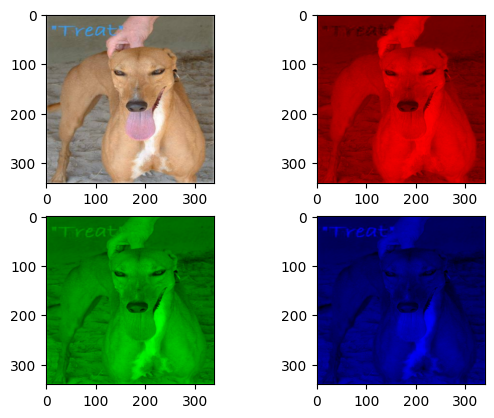

In [170]:
fig = plt.figure()
gs = gridspec.GridSpec(2,2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(output_identity)

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(output_red)

ax3 = fig.add_subplot(gs[1,0])
ax3.imshow(output_green)

ax4 = fig.add_subplot(gs[1,1])
ax4.imshow(output_blue)

## Applying kernel to a image RGB and convert it into gray scale

In [184]:
#Gray = 0.2989 * R + 0.5870 * G + 0.1140 * B


bw_kernel = torch.tensor([[
[0,  0,  0],
[0,  0.2989,  0],
[0,  0,  0]],
[
[0,  0,  0],
[0,  0.5870,  0],
[0,  0,  0]],
[
[0,  0,  0],
[0,  0.1140,  0],
[0,  0,  0]]], dtype =  torch.float32)

# Reshape to (out_channels, in_channels, H, W)
bw_kernel = bw_kernel.unsqueeze(0) #.permute(1, 0, 2, 3).contiguous()

print(bw_kernel.shape)
print(image_tensor.shape)

torch.Size([1, 3, 3, 3])
torch.Size([1, 3, 340, 340])


In [186]:

# 3. Apply convolution with padding=1 to keep output size same
output_bw = F.conv2d(image_tensor, bw_kernel, groups = 1)

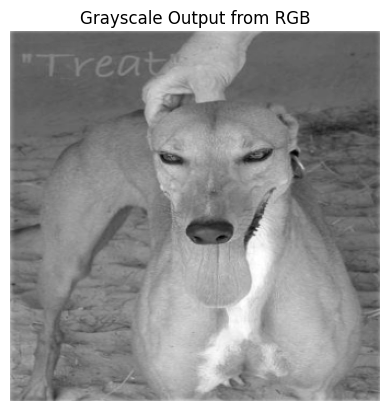

In [187]:
# Plot the grayscale result
grayscale = output_bw.squeeze().detach().numpy()
grayscale = (grayscale - grayscale.min()) / (grayscale.max() - grayscale.min() + 1e-5)

plt.imshow(grayscale, cmap='gray')
plt.title("Grayscale Output from RGB")
plt.axis('off')
plt.show()


## Kernels for edge detection

* Horizontal filters - Top row positive, bottom row negative or vice-versal
* Vertical filters - Left +ve and right -ve or vice veral

Popular filters/kernels - 

* Sobel (has smoothing)
* Prewitt (no smoothing)

sobel_horizontal = torch.tensor([[
    [-1., -2., -1.],
    [ 0.,  0.,  0.],
    [ 1.,  2.,  1.]
]])


prewitt_horizontal = torch.tensor([[
    [-1., -1., -1.],
    [ 0.,  0.,  0.],
    [ 1.,  1.,  1.]
]])


In [213]:
prewitt_horizontal = torch.tensor([[
    [-1., -1., -1.],
    [ 0.,  0.,  0.],
    [ 1.,  1.,  1.]
]])

prewitt_horizontal = prewitt_horizontal.unsqueeze(0)
prewitt_horizontal.shape

prewitt_vertical = torch.tensor([[
    [1., 0., -1.],
    [ 1.,  0.,  -1.],
    [ 1.,  0.,  -1.]
]])

prewitt_vertical = prewitt_vertical.unsqueeze(0)
prewitt_vertical.shape

torch.Size([1, 1, 3, 3])

In [197]:

grayscale.shape

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_19388\882253430.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  grayscale = torch.tensor(grayscale)


torch.Size([1, 338, 338])

torch.Size([336, 336])


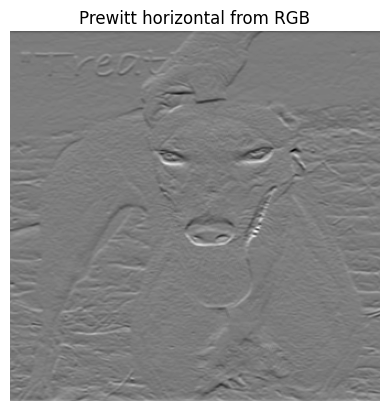

In [215]:
output_bw = F.conv2d(grayscale, prewitt_horizontal, groups = 1)

output_bw = output_bw.squeeze().detach().numpy()
output_bw = (output_bw - output_bw.min()) / (output_bw.max() - output_bw.min() + 1e-5)
output_bw = torch.tensor(output_bw) 
output_bw =output_bw.squeeze(0)

print(output_bw.shape)

plt.imshow(output_bw, cmap='gray')
plt.title("Prewitt horizontal from RGB")
plt.axis('off')
plt.show()


torch.Size([336, 336])


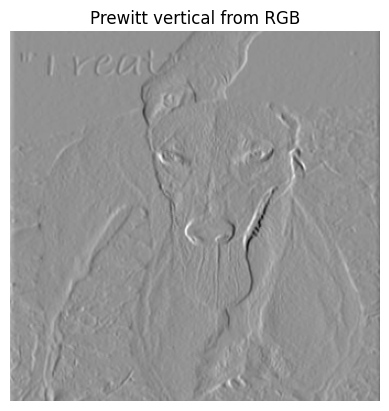

In [216]:
output_bw = F.conv2d(grayscale, prewitt_vertical, groups = 1)

output_bw = output_bw.squeeze().detach().numpy()
output_bw = (output_bw - output_bw.min()) / (output_bw.max() - output_bw.min() + 1e-5)
output_bw = torch.tensor(output_bw) 
output_bw =output_bw.squeeze(0)

print(output_bw.shape)

plt.imshow(output_bw, cmap='gray')
plt.title("Prewitt vertical from RGB")
plt.axis('off')
plt.show()


In [ ]:
Great question! If you're diving into Computer Vision (CV), it's smart to build a solid foundation by learning a core set of algorithms and techniques that form the basis for both traditional CV and modern deep learning–based approaches.

🧠 Must-Know Basic CV Algorithms and Concepts
🔹 1. Image Fundamentals
Color spaces: RGB, BGR, HSV, LAB, Grayscale

Image representation: arrays, channels, shape

Bit depth and pixel intensity

🔹 2. Image Processing Basics
Resizing, cropping, rotating, flipping

Image thresholding

Global thresholding (e.g. Otsu’s method)

Adaptive thresholding

Filtering / Convolutions

Smoothing: Gaussian, Median, Bilateral

Sharpening

Edge detection: Sobel, Laplacian

🔹 3. Edge and Contour Detection
Canny Edge Detector

Contours:

cv2.findContours()

Contour approximation

Area, perimeter, bounding boxes

🔹 4. Feature Detection and Matching
Keypoint detectors & descriptors:

SIFT, SURF (patented), ORB (free and fast)

Feature matching:

Brute-force matcher

FLANN-based matcher

Homography & Image alignment

🔹 5. Geometric Transformations
Translation, rotation, scaling, affine transforms

Perspective transforms and warping

Image stitching basics

🔹 6. Morphological Operations
Erosion, dilation

Opening, closing

Useful for removing noise or small objects

🔹 7. Histogram Analysis
Histograms of pixel intensities

Histogram equalization & CLAHE (adaptive contrast)

Color histograms for object tracking

🔹 8. Object Detection Basics
Haar cascades (for face detection, etc.)

Sliding windows and image pyramids

Connected components labeling

🔹 9. Segmentation
Threshold-based segmentation

Region-based (Watershed algorithm)

Clustering: K-means for image segmentation

🔹 10. Camera & Perspective Geometry
Camera calibration (intrinsic/extrinsic parameters)

Lens distortion correction

Epipolar geometry and stereo vision basics

🔍 Bonus: Learn the Ecosystem
Libraries:

OpenCV – traditional CV

PIL, imageio, scikit-image

torchvision – for PyTorch pipelines

Albumentations – for strong augmentations

Deep Learning Transition:

CNNs (e.g., classification with ResNet)

Transfer learning

Object detection (YOLO, SSD)

Semantic segmentation (UNet, DeepLab)

✅ Suggested Learning Path (Progressive)
Image I/O, filters, histograms

Edge detection & contours

Morphological ops & segmentation

Geometric transforms & stitching

Feature matching

Mini-projects: e.g., document scanner, barcode reader

CNNs & deep learning CV

Would you like a list of mini-projects to practice these topics?











Tools


